# Input the Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from scipy import stats
from mlxtend.regressor import StackingCVRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

/opt/anaconda3/envs/python38/lib/python3.8/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [2]:
df = pd.read_csv('train.csv')

In [3]:
df.shape

(665249, 25)

In [4]:
df.dtypes

customer_ID            int64
shopping_pt            int64
record_type            int64
day                    int64
time                  object
state                 object
location               int64
group_size             int64
homeowner              int64
car_age                int64
car_value             object
risk_factor          float64
age_oldest             int64
age_youngest           int64
married_couple         int64
C_previous           float64
duration_previous    float64
A                      int64
B                      int64
C                      int64
D                      int64
E                      int64
F                      int64
G                      int64
cost                   int64
dtype: object

In [5]:
# unique customer record
df = df.sort_values('shopping_pt').groupby('customer_ID').tail(1)

In [58]:
df

,customer_ID,shopping_pt,record_type,day,time,state,location,group_size,homeowner,car_age,...,C_previous,duration_previous,A,B,C,D,E,F,G,cost
656091,10150652,3,1,1,15:54,FL,11042,2,0,16,...,3.0,4.0,0,0,1,2,0,0,3,638
319942,10073518,3,1,4,15:05,AL,13306,1,1,12,...,4.0,15.0,1,0,4,3,1,1,2,628
293191,10067511,3,1,4,11:09,IN,10437,1,0,16,...,4.0,2.0,0,0,1,2,0,0,2,565
640086,10147076,3,1,4,12:27,GA,12482,1,1,1,...,1.0,10.0,1,1,2,3,1,2,2,627
22028,10005168,3,1,1,08:20,NY,13033,1,1,18,...,1.0,12.0,0,0,2,3,0,0,2,589
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
553914,10127321,13,1,1,20:42,NM,13774,1,1,11,...,3.0,1.0,1,0,3,3,0,1,1,620
169777,10039333,13,1,4,11:36,FL,15610,1,1,6,...,3.0,15.0,1,0,1,3,0,2,3,710
561826,10129147,13,1,4,11:22,RI,13284,1,1,15,...,3.0,5.0,0,0,2,3,0,0,2,635
583335,10134075,13,1,0,13:59,OK,14794,1,1,13,...,3.0,10.0,2,0,4,3,1,2,3,609


In [ ]:
# Keep only one record with largest population for each zip code
msa = pd.read_csv('kaggle2010.csv')
msa = msa.sort_values('population').groupby('location').tail(1)

In [7]:
# Sort the dataset based on population
newdf = pd.merge(df, msa, how = 'inner')
newdf = newdf.sort_values('population', ascending = False)
newdf

,customer_ID,shopping_pt,record_type,day,time,state,location,group_size,homeowner,car_age,...,D,E,F,G,cost,population,minimum_age,maximum_age,gender,geo_id
27671,10015374,6,1,3,12:16,PA,11226,1,1,8,...,3,1,2,2,679,101572,NaN,NaN,NaN,8600000US11226
27672,10150436,7,1,0,12:52,PA,11226,1,0,1,...,3,1,1,4,671,101572,NaN,NaN,NaN,8600000US11226
27670,10080300,5,1,4,12:10,PA,11226,2,1,13,...,3,1,1,4,644,101572,NaN,NaN,NaN,8600000US11226
27669,10135513,4,1,3,10:24,PA,11226,1,0,5,...,3,1,1,4,684,101572,NaN,NaN,NaN,8600000US11226
27668,10017890,4,1,3,13:00,PA,11226,2,1,4,...,3,1,2,2,625,101572,NaN,NaN,NaN,8600000US11226
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23536,10134356,4,1,4,10:50,TN,11351,1,0,8,...,3,1,2,1,624,0,60.0,61.0,male,8600000US11351
23535,10131057,4,1,1,08:00,TN,11351,1,0,9,...,3,1,2,4,603,0,60.0,61.0,male,8600000US11351
23534,10040086,4,1,0,15:25,TN,11351,2,0,13,...,2,0,2,1,599,0,60.0,61.0,male,8600000US11351
23533,10107338,4,1,4,15:00,TN,11351,1,0,23,...,2,0,0,1,633,0,60.0,61.0,male,8600000US11351


In [8]:
# Remove record whose populatin is 0
newdf = newdf[newdf.population != 0]

<AxesSubplot:>

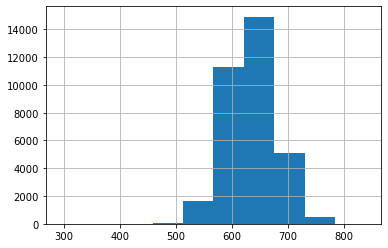

In [9]:
newdf['cost'].hist()

In [10]:
newdf['population'] = pd.cut(newdf['population'],[-1,10000,20000,200000], labels=['low','medium','high'])


/var/folders/v6/91_216vx0n37sl20sb1d51lm0000gn/T/ipykernel_81841/982706127.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newdf['population'] = pd.cut(newdf['population'],[-1,10000,20000,200000], labels=['low','medium','high'])


In [11]:
len(newdf[newdf['population'] == 'low'])

24063

In [12]:
newdf.rename(columns = {'population':'msa'}, inplace = True)

/var/folders/v6/91_216vx0n37sl20sb1d51lm0000gn/T/ipykernel_81841/1100507436.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newdf.rename(columns = {'population':'msa'}, inplace = True)


In [13]:
newdf.columns

Index(['customer_ID', 'shopping_pt', 'record_type', 'day', 'time', 'state',
       'location', 'group_size', 'homeowner', 'car_age', 'car_value',
       'risk_factor', 'age_oldest', 'age_youngest', 'married_couple',
       'C_previous', 'duration_previous', 'A', 'B', 'C', 'D', 'E', 'F', 'G',
       'cost', 'msa', 'minimum_age', 'maximum_age', 'gender', 'geo_id'],
      dtype='object')

In [14]:
# Remove unnececary columns
newdf = newdf.drop(['customer_ID', 'record_type', 'time', 'state', 'A', 'B', 'C', 
                    'D', 'E', 'F', 'G', 'minimum_age', 'maximum_age', 'geo_id'], axis = 1)

In [15]:
newdf = pd.get_dummies(newdf, columns=['car_value'])

In [16]:
newdf['risk_factor'].unique()

array([nan,  4.,  3.,  2.,  1.])

# Missing Data

In [17]:
total = newdf.isnull().sum().sort_values(ascending=False)
percent = (newdf.isnull().sum()/newdf.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data[missing_data['Total'] != 0]

,Total,Percent
gender,20565,0.612473
risk_factor,11975,0.356643
C_previous,282,0.008399
duration_previous,282,0.008399


In [18]:
newdf = newdf.drop(['gender'], axis = 1)

In [19]:
newdf["risk_factor"].fillna(0, inplace = True)

In [20]:
mean_value_c = newdf["C_previous"].mean()
mean_value_d = newdf["duration_previous"].mean()

newdf["C_previous"].fillna(value=int(mean_value_c), inplace=True)
newdf["duration_previous"].fillna(value=int(mean_value_d), inplace=True)

In [21]:
newdf["C_previous"] = newdf["C_previous"].astype(int)
newdf["duration_previous"] = newdf["duration_previous"].astype(int)
newdf["risk_factor"] = newdf["risk_factor"].astype(int)

# Encoding

In [22]:
newdf = pd.get_dummies(newdf, columns=['msa'])

# Outlier

In [23]:
#Univariate
saleprice_scaled = StandardScaler().fit_transform(newdf['cost'][:,np.newaxis]);
low_range = saleprice_scaled[saleprice_scaled[:,0].argsort()][:10]
high_range= saleprice_scaled[saleprice_scaled[:,0].argsort()][-10:]
print('outer range (low) of the distribution:')
print(low_range)
print('\nouter range (high) of the distribution:')
print(high_range)

outer range (low) of the distribution:
[[-7.85250376]
 [-7.48215953]
 [-7.43586651]
 [-7.43586651]
 [-7.34328045]
 [-7.25069439]
 [-6.53315245]
 [-6.48685942]
 [-6.39427336]
 [-6.34798033]]

outer range (high) of the distribution:
[[3.48928827]
 [3.60502084]
 [3.65131387]
 [3.6976069 ]
 [3.6976069 ]
 [3.8596325 ]
 [3.90592552]
 [4.29941627]
 [4.39200233]
 [4.73920004]]


/var/folders/v6/91_216vx0n37sl20sb1d51lm0000gn/T/ipykernel_81841/3845170936.py:2: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  saleprice_scaled = StandardScaler().fit_transform(newdf['cost'][:,np.newaxis]);


# Feature Correlation

<AxesSubplot:>

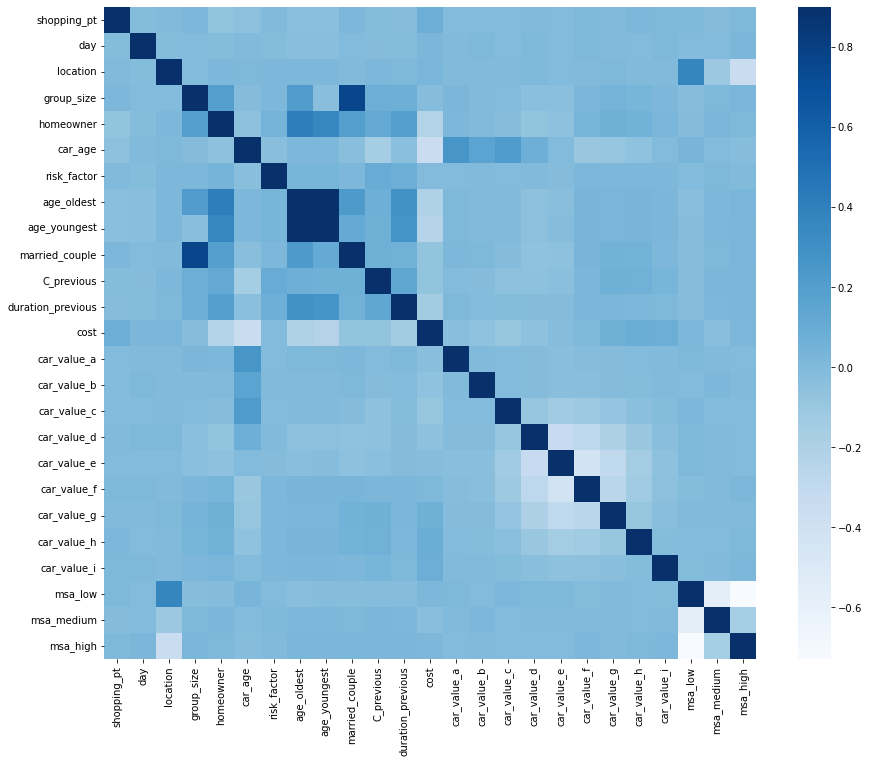

In [24]:
corr = newdf.corr()
plt.subplots(figsize=(15,12))
sns.heatmap(corr, vmax=0.9, cmap="Blues", square=True)

In [25]:
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
# y = newdf[['cost']]
# newdf['cost'] = scaler.fit_transform(y)

In [26]:
newdf

,shopping_pt,day,location,group_size,homeowner,car_age,risk_factor,age_oldest,age_youngest,married_couple,...,car_value_c,car_value_d,car_value_e,car_value_f,car_value_g,car_value_h,car_value_i,msa_low,msa_medium,msa_high
27671,6,3,11226,1,1,8,0,65,65,0,...,0,0,0,0,1,0,0,0,0,1
27672,7,0,11226,1,0,1,0,30,30,0,...,0,0,0,1,0,0,0,0,0,1
27670,5,4,11226,2,1,13,0,58,55,1,...,0,0,0,0,1,0,0,0,0,1
27669,4,3,11226,1,0,5,4,28,28,0,...,0,0,1,0,0,0,0,0,0,1
27668,4,3,11226,2,1,4,0,44,43,1,...,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32479,7,3,10170,1,1,7,0,48,48,0,...,0,0,0,0,1,0,0,1,0,0
32478,7,2,10170,1,0,3,4,28,28,0,...,0,0,0,0,1,0,0,1,0,0
32476,6,1,10170,1,1,11,2,41,41,0,...,0,0,1,0,0,0,0,1,0,0
32475,5,4,10170,1,0,9,3,22,22,0,...,0,1,0,0,0,0,0,1,0,0


# Model without bias terms

In [27]:
df_nobias = newdf.drop(['risk_factor', 'msa_low', 'msa_medium', 'msa_high'], axis = 1)

In [28]:
df_nobias

,shopping_pt,day,location,group_size,homeowner,car_age,age_oldest,age_youngest,married_couple,C_previous,...,cost,car_value_a,car_value_b,car_value_c,car_value_d,car_value_e,car_value_f,car_value_g,car_value_h,car_value_i
27671,6,3,11226,1,1,8,65,65,0,3,...,679,0,0,0,0,0,0,1,0,0
27672,7,0,11226,1,0,1,30,30,0,3,...,671,0,0,0,0,0,1,0,0,0
27670,5,4,11226,2,1,13,58,55,1,3,...,644,0,0,0,0,0,0,1,0,0
27669,4,3,11226,1,0,5,28,28,0,4,...,684,0,0,0,0,1,0,0,0,0
27668,4,3,11226,2,1,4,44,43,1,3,...,625,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32479,7,3,10170,1,1,7,48,48,0,3,...,662,0,0,0,0,0,0,1,0,0
32478,7,2,10170,1,0,3,28,28,0,3,...,654,0,0,0,0,0,0,1,0,0
32476,6,1,10170,1,1,11,41,41,0,4,...,607,0,0,0,0,1,0,0,0,0
32475,5,4,10170,1,0,9,22,22,0,2,...,685,0,0,0,1,0,0,0,0,0


In [29]:
# Gradient Boosting Regressor
gbr = GradientBoostingRegressor(n_estimators=6000,
                                learning_rate=0.01,
                                max_depth=4,
                                max_features='sqrt',
                                min_samples_leaf=15,
                                min_samples_split=10,
                                loss='huber',
                                random_state=42)  

# Random Forest Regressor
rf = RandomForestRegressor(n_estimators=1200,
                          max_depth=15,
                          min_samples_split=5,
                          min_samples_leaf=5,
                          max_features=None,
                          oob_score=True,
                          random_state=42)


# Linear Regression
lr = LinearRegression()

In [30]:
train = df_nobias.drop('cost', axis=1)
test = df_nobias['cost']

In [31]:
X_train, X_test, y_train, y_test = train_test_split(train, test, test_size=0.2, random_state=42)
kf = KFold(n_splits=12, random_state=42, shuffle=True)

In [32]:
#Linear Regression
reg = lr.fit(X_train,y_train)
pred_lr = reg.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, pred_lr))
mse = mean_squared_error(y_test, pred_lr)
mae = mean_absolute_error(y_test, pred_lr)
cv = cross_val_score(reg,X_train,y_train,cv=5)
print(cv.mean())
print("RMSE: %f" % (rmse))
print("MSE: %f" % (mse))
print("MAE: %f" % (mae))

0.2556769011216827
RMSE: 37.965831
MSE: 1441.404330
MAE: 29.793455


In [33]:
#random forest
rf.fit(X_train,y_train)
pred_rf = rf.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, pred_rf))
mse = mean_squared_error(y_test, pred_rf)
mae = mean_absolute_error(y_test, pred_rf)
cv = cross_val_score(rf,X_train,y_train,cv=5)
print(cv.mean())
print("RMSE: %f" % (rmse))
print("MSE: %f" % (mse))
print("MAE: %f" % (mae))

0.2712619114265983
RMSE: 37.500909
MSE: 1406.318181
MAE: 29.322632


In [34]:
#gbr
gbr.fit(X_train,y_train)
pred_gbr = gbr.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, pred_gbr))
mse = mean_squared_error(y_test, pred_gbr)
mae = mean_absolute_error(y_test, pred_gbr)
cv = cross_val_score(gbr,X_train,y_train,cv=5)
print(cv.mean())
print("RMSE: %f" % (rmse))
print("MSE: %f" % (mse))
print("MAE: %f" % (mae))

0.3186671753676707
RMSE: 36.144943
MSE: 1306.456939
MAE: 28.205812


In [35]:
from sklearn.metrics import r2_score

r2_lr = r2_score(y_test, pred_lr)
r2_rf = r2_score(y_test, pred_rf)
r2_gbr = r2_score(y_test, pred_gbr)
print("r2_lr: %f" % (r2_lr))
print("r2_rf: %f" % (r2_rf))
print("r2_gbr: %f" % (r2_gbr))

r2_lr: 0.239418
r2_rf: 0.257932
r2_gbr: 0.310625


# Model with one bias item (msa)

In [36]:
df_msabias = newdf.drop(['risk_factor'], axis = 1)

In [37]:
df_msabias

,shopping_pt,day,location,group_size,homeowner,car_age,age_oldest,age_youngest,married_couple,C_previous,...,car_value_c,car_value_d,car_value_e,car_value_f,car_value_g,car_value_h,car_value_i,msa_low,msa_medium,msa_high
27671,6,3,11226,1,1,8,65,65,0,3,...,0,0,0,0,1,0,0,0,0,1
27672,7,0,11226,1,0,1,30,30,0,3,...,0,0,0,1,0,0,0,0,0,1
27670,5,4,11226,2,1,13,58,55,1,3,...,0,0,0,0,1,0,0,0,0,1
27669,4,3,11226,1,0,5,28,28,0,4,...,0,0,1,0,0,0,0,0,0,1
27668,4,3,11226,2,1,4,44,43,1,3,...,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32479,7,3,10170,1,1,7,48,48,0,3,...,0,0,0,0,1,0,0,1,0,0
32478,7,2,10170,1,0,3,28,28,0,3,...,0,0,0,0,1,0,0,1,0,0
32476,6,1,10170,1,1,11,41,41,0,4,...,0,0,1,0,0,0,0,1,0,0
32475,5,4,10170,1,0,9,22,22,0,2,...,0,1,0,0,0,0,0,1,0,0


In [38]:
train = df_msabias.drop('cost', axis=1)
test = df_msabias['cost']

In [39]:
X_train, X_test, y_train, y_test = train_test_split(train, test, test_size=0.2, random_state=42)
kf = KFold(n_splits=12, random_state=42, shuffle=True)

In [40]:
#Linear Regression
reg = lr.fit(X_train,y_train)
pred_lr = reg.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, pred_lr))
mse = mean_squared_error(y_test, pred_lr)
mae = mean_absolute_error(y_test, pred_lr)
cv = cross_val_score(reg,X_train,y_train,cv=5)
print(cv.mean())
print("RMSE: %f" % (rmse))
print("MSE: %f" % (mse))
print("MAE: %f" % (mae))

0.2564042565034216
RMSE: 37.947773
MSE: 1440.033472
MAE: 29.768538


In [41]:
#random forest
rf.fit(X_train,y_train)
pred_rf = rf.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, pred_rf))
mse = mean_squared_error(y_test, pred_rf)
mae = mean_absolute_error(y_test, pred_rf)
cv = cross_val_score(rf,X_train,y_train,cv=5)
print(cv.mean())
print("RMSE: %f" % (rmse))
print("MSE: %f" % (mse))
print("MAE: %f" % (mae))

0.2723421275584344
RMSE: 37.474398
MSE: 1404.330530
MAE: 29.297569


In [42]:
#gbr
gbr.fit(X_train,y_train)
pred_gbr = gbr.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, pred_gbr))
mse = mean_squared_error(y_test, pred_gbr)
mae = mean_absolute_error(y_test, pred_gbr)
cv = cross_val_score(gbr,X_train,y_train,cv=5)
print(cv.mean())
print("RMSE: %f" % (rmse))
print("MSE: %f" % (mse))
print("MAE: %f" % (mae))

0.3190834034948995
RMSE: 36.184628
MSE: 1309.327270
MAE: 28.224583


In [43]:
r2_lr = r2_score(y_test, pred_lr)
r2_rf = r2_score(y_test, pred_rf)
r2_gbr = r2_score(y_test, pred_gbr)
print("r2_lr: %f" % (r2_lr))
print("r2_rf: %f" % (r2_rf))
print("r2_gbr: %f" % (r2_gbr))

r2_lr: 0.240141
r2_rf: 0.258981
r2_gbr: 0.309111


# Model with one bias item (risk)

In [44]:
df_riskbias = newdf.drop(['msa_low', 'msa_medium', 'msa_high'], axis = 1)

In [45]:
df_riskbias

,shopping_pt,day,location,group_size,homeowner,car_age,risk_factor,age_oldest,age_youngest,married_couple,...,cost,car_value_a,car_value_b,car_value_c,car_value_d,car_value_e,car_value_f,car_value_g,car_value_h,car_value_i
27671,6,3,11226,1,1,8,0,65,65,0,...,679,0,0,0,0,0,0,1,0,0
27672,7,0,11226,1,0,1,0,30,30,0,...,671,0,0,0,0,0,1,0,0,0
27670,5,4,11226,2,1,13,0,58,55,1,...,644,0,0,0,0,0,0,1,0,0
27669,4,3,11226,1,0,5,4,28,28,0,...,684,0,0,0,0,1,0,0,0,0
27668,4,3,11226,2,1,4,0,44,43,1,...,625,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32479,7,3,10170,1,1,7,0,48,48,0,...,662,0,0,0,0,0,0,1,0,0
32478,7,2,10170,1,0,3,4,28,28,0,...,654,0,0,0,0,0,0,1,0,0
32476,6,1,10170,1,1,11,2,41,41,0,...,607,0,0,0,0,1,0,0,0,0
32475,5,4,10170,1,0,9,3,22,22,0,...,685,0,0,0,1,0,0,0,0,0


In [46]:
train = df_riskbias.drop('cost', axis=1)
test = df_riskbias['cost']

In [47]:
X_train, X_test, y_train, y_test = train_test_split(train, test, test_size=0.2, random_state=42)
kf = KFold(n_splits=12, random_state=42, shuffle=True)

In [48]:
#Linear Regression
reg = lr.fit(X_train,y_train)
pred_lr = reg.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, pred_lr))
mse = mean_squared_error(y_test, pred_lr)
mae = mean_absolute_error(y_test, pred_lr)
cv = cross_val_score(reg,X_train,y_train,cv=5)
print(cv.mean())
print("RMSE: %f" % (rmse))
print("MSE: %f" % (mse))
print("MAE: %f" % (mae))

0.2556624994379185
RMSE: 37.963468
MSE: 1441.224875
MAE: 29.794566


In [49]:
#random forest
rf.fit(X_train,y_train)
pred_rf = rf.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, pred_rf))
mse = mean_squared_error(y_test, pred_rf)
mae = mean_absolute_error(y_test, pred_rf)
cv = cross_val_score(rf,X_train,y_train,cv=5)
print(cv.mean())
print("RMSE: %f" % (rmse))
print("MSE: %f" % (mse))
print("MAE: %f" % (mae))

0.2818445775643498
RMSE: 37.314572
MSE: 1392.377258
MAE: 29.125134


In [50]:
#gbr
gbr.fit(X_train,y_train)
pred_gbr = gbr.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, pred_gbr))
mse = mean_squared_error(y_test, pred_gbr)
mae = mean_absolute_error(y_test, pred_gbr)
cv = cross_val_score(gbr,X_train,y_train,cv=5)
print(cv.mean())
print("RMSE: %f" % (rmse))
print("MSE: %f" % (mse))
print("MAE: %f" % (mae))

0.3341139634945985
RMSE: 35.848244
MSE: 1285.096578
MAE: 27.845123


In [51]:
r2_lr = r2_score(y_test, pred_lr)
r2_rf = r2_score(y_test, pred_rf)
r2_gbr = r2_score(y_test, pred_gbr)
print("r2_lr: %f" % (r2_lr))
print("r2_rf: %f" % (r2_rf))
print("r2_gbr: %f" % (r2_gbr))

r2_lr: 0.239513
r2_rf: 0.265288
r2_gbr: 0.321897


# Model with all bias items

In [52]:
train = newdf.drop('cost', axis=1)
test = newdf['cost']

In [53]:
X_train, X_test, y_train, y_test = train_test_split(train, test, test_size=0.2, random_state=42)
kf = KFold(n_splits=12, random_state=42, shuffle=True)

In [54]:
#Linear Regression
reg = lr.fit(X_train,y_train)
pred_lr = reg.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, pred_lr))
mse = mean_squared_error(y_test, pred_lr)
mae = mean_absolute_error(y_test, pred_lr)
cv = cross_val_score(reg,X_train,y_train,cv=5)
print(cv.mean())
print("RMSE: %f" % (rmse))
print("MSE: %f" % (mse))
print("MAE: %f" % (mae))

0.25639123783764306
RMSE: 37.945359
MSE: 1439.850302
MAE: 29.769666


In [55]:
#random forest
rf.fit(X_train,y_train)
pred_rf = rf.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, pred_rf))
mse = mean_squared_error(y_test, pred_rf)
mae = mean_absolute_error(y_test, pred_rf)
cv = cross_val_score(rf,X_train,y_train,cv=5)
print(cv.mean())
print("RMSE: %f" % (rmse))
print("MSE: %f" % (mse))
print("MAE: %f" % (mae))

0.2828008985818801
RMSE: 37.289748
MSE: 1390.525343
MAE: 29.095226


In [56]:
#gbr
gbr.fit(X_train,y_train)
pred_gbr = gbr.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, pred_gbr))
mse = mean_squared_error(y_test, pred_gbr)
mae = mean_absolute_error(y_test, pred_gbr)
cv = cross_val_score(gbr,X_train,y_train,cv=5)
print(cv.mean())
print("RMSE: %f" % (rmse))
print("MSE: %f" % (mse))
print("MAE: %f" % (mae))

0.3334335029144679
RMSE: 35.850759
MSE: 1285.276935
MAE: 27.866414


In [57]:
r2_lr = r2_score(y_test, pred_lr)
r2_rf = r2_score(y_test, pred_rf)
r2_gbr = r2_score(y_test, pred_gbr)
print("r2_lr: %f" % (r2_lr))
print("r2_rf: %f" % (r2_rf))
print("r2_gbr: %f" % (r2_gbr))

r2_lr: 0.240238
r2_rf: 0.266265
r2_gbr: 0.321801


# Summary of all model performances

In [59]:
# Since running the code above is too long, we just hard code the metrics values with the reference above
data = [{'Linear Regression': 1441.4043, 'Random Forest': 1406.3181, 'Gradient Boosting': 1306.4569}, #MSE
        {'Linear Regression': 0.2557, 'Random Forest': 0.2713, 'Gradient Boosting': 0.3187}, #CV
        {'Linear Regression': 0.2394, 'Random Forest': 0.2579, 'Gradient Boosting': 0.3106}  #R2
       ]

master = pd.DataFrame(
    data, 
    columns = ['Linear Regression', 'Random Forest', 'Gradient Boosting'], index = ['MSE','CV' ,'R^2']
    )

print('Evaluation for No Bias Model')
print('-----------------------------------------')
(master)

Evaluation for No Bias Model
-----------------------------------------


,Linear Regression,Random Forest,Gradient Boosting
MSE,1441.4043,1406.3181,1306.4569
CV,0.2557,0.2713,0.3187
R^2,0.2394,0.2579,0.3106


In [60]:
data = [{'Linear Regression': 1440.0334, 'Random Forest': 1404.3305, 'Gradient Boosting': 1309.3272}, #MSE
        {'Linear Regression': 0.2564, 'Random Forest': 0.2723, 'Gradient Boosting': 0.3191}, #CV
        {'Linear Regression': 0.2401, 'Random Forest': 0.2589, 'Gradient Boosting': 0.3091}  #R2
       ]

master = pd.DataFrame(
    data, 
    columns = ['Linear Regression', 'Random Forest', 'Gradient Boosting'], index = ['MSE','CV' ,'R^2']
    )

print('Evaluation for Bias(MSA) Model')
print('-----------------------------------------')
(master)

Evaluation for Bias(MSA) Model
-----------------------------------------


,Linear Regression,Random Forest,Gradient Boosting
MSE,1440.0334,1404.3305,1309.3272
CV,0.2564,0.2723,0.3191
R^2,0.2401,0.2589,0.3091


In [61]:
data = [{'Linear Regression': 1441.2249, 'Random Forest': 1392.3773, 'Gradient Boosting': 1285.0966}, #MSE
        {'Linear Regression': 0.2557, 'Random Forest': 0.2818, 'Gradient Boosting': 0.3341}, #CV
        {'Linear Regression': 0.2395, 'Random Forest': 0.2653, 'Gradient Boosting': 0.3219}  #R2
       ]

master = pd.DataFrame(
    data, 
    columns = ['Linear Regression', 'Random Forest', 'Gradient Boosting'], index = ['MSE','CV' ,'R^2']
    )

print('Evaluation for Bias(Risk Factor) Model')
print('-----------------------------------------')
(master)

Evaluation for Bias(Risk Factor) Model
-----------------------------------------


,Linear Regression,Random Forest,Gradient Boosting
MSE,1441.2249,1392.3773,1285.0966
CV,0.2557,0.2818,0.3341
R^2,0.2395,0.2653,0.3219


In [62]:
data = [{'Linear Regression': 1439.8503, 'Random Forest': 1390.5253, 'Gradient Boosting': 1285.2769}, #MSE
        {'Linear Regression': 0.2564, 'Random Forest': 0.2828, 'Gradient Boosting': 0.3334}, #CV
        {'Linear Regression': 0.2402, 'Random Forest': 0.2663, 'Gradient Boosting': 0.3218}  #R2
       ]

master = pd.DataFrame(
    data, 
    columns = ['Linear Regression', 'Random Forest', 'Gradient Boosting'], index = ['MSE','CV' ,'R^2']
    )

print('Evaluation for All Bias Model')
print('-----------------------------------------')
(master)

Evaluation for All Bias Model
-----------------------------------------


,Linear Regression,Random Forest,Gradient Boosting
MSE,1439.8503,1390.5253,1285.2769
CV,0.2564,0.2828,0.3334
R^2,0.2402,0.2663,0.3218
